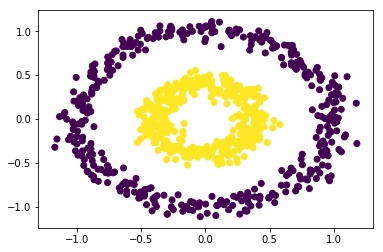

In [11]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
x,y=make_circles(n_samples=800,noise=.07,factor=.4)
plt.scatter(x[:,0],x[:,1],c=y+1)
plt.show()

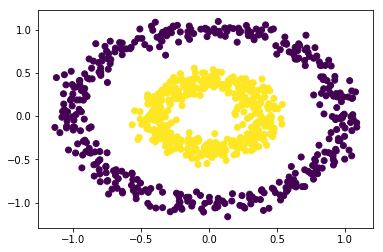

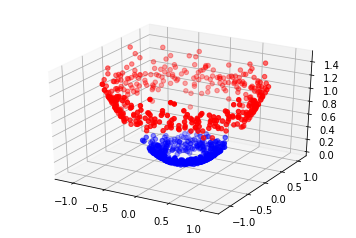

In [15]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

visualization=True

def create_data():
    x,y=make_circles(n_samples=800,noise=.07,factor=.4)
    if visualization:
        plt.scatter(x[:,0],x[:,1],c=y+1)
        plt.show()
        return x,y

def project_data(data):
    x=data[:,0]
    y=data[:,1]
    z=x**2+y**2
    return x,y,z

data,label=create_data()
x,y,z=project_data(data)
if visualization:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[label==0],y[label==0],z[label==0],c='r')
    ax.scatter(x[label==1],y[label==1],z[label==1],c='b')
    plt.show()


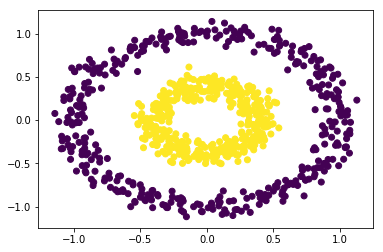

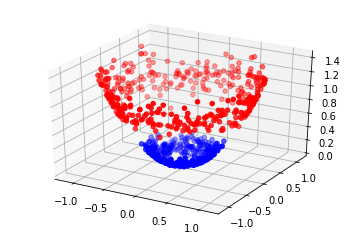

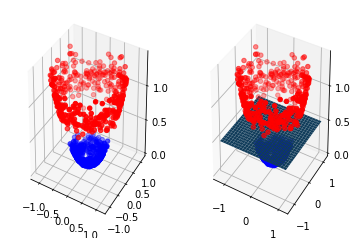

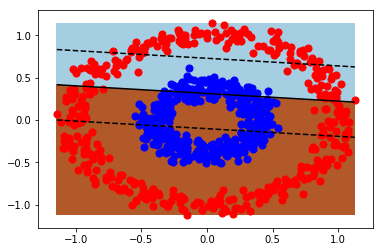

linear  Kernal Accuracy:  0.605


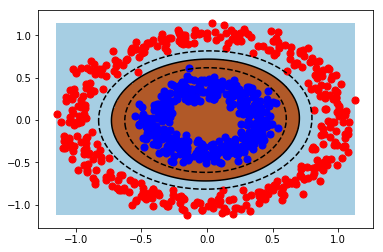

rbf  Kernal Accuracy:  1.0


In [18]:

from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
visualization=True

def create_data():
    x,y=make_circles(n_samples=800,noise=.07,factor=.4)
    if visualization:
        plt.scatter(x[:,0],x[:,1],c=y+1)
        plt.show()
        return x,y

def project_data(data):
    x=data[:,0]
    y=data[:,1]
    z=x**2+y**2
    return x,y,z

def plot_decision_surface_manual(x,y,z,label):
    fig = plt.figure()
    ax = fig.add_subplot(121,projection='3d')
    ax.scatter(x[label==0],y[label==0],z[label==0],c='r')
    ax.scatter(x[label==1],y[label==1],z[label==1],c='b')
    ax1 = fig.add_subplot(122,projection='3d')
    ax1.scatter(x[label==0],y[label==0],z[label==0],c='r')
    ax1.scatter(x[label==1],y[label==1],z[label==1],c='b')
    plane_x=np.arange(-1.25,1.25,.1)
    plane_y=np.arange(-1.25,1.25,.1)
    X,Y=np.meshgrid(plane_x,plane_y)
    Z=np.zeros(X.shape)
    Z[:,:]=.5
    ax1.plot_surface(X,Y,Z)
    plt.show()
    
def plot_decision_surface_sklearn(clf,X,y):
    X0 = X[np.where(y == 0)]
    X1 = X[np.where(y == 1)]

    plt.figure()
    
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
              linestyles=['--', '-', '--'],
              levels=[-.5, 0, .5])
    plt.scatter(X0[:, 0], X0[:, 1], c='r',s=50)
    plt.scatter(X1[:, 0], X1[:, 1], c='b',s=50)
    plt.show()

data,label=create_data()
x,y,z=project_data(data)
if visualization:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[label==0],y[label==0],z[label==0],c='r')
    ax.scatter(x[label==1],y[label==1],z[label==1],c='b')
    plt.show()
    plot_decision_surface_manual(x,y,z,label)
train=np.c_[x,y]
for kernel_type in ['linear','rbf']:
    clf=SVC(kernel=kernel_type)
    clf.fit(train,label)
    if visualization:
        plot_decision_surface_sklearn(clf,train,label)
        output=clf.predict(train)
        print (kernel_type,(" Kernal Accuracy: "),accuracy_score(label,output))


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

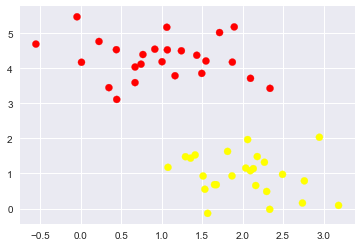

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50,centers=2, random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

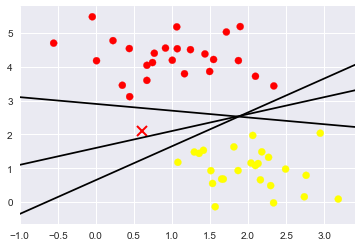

In [5]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)

for m, b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
    plt.xlim(-1,3.4);

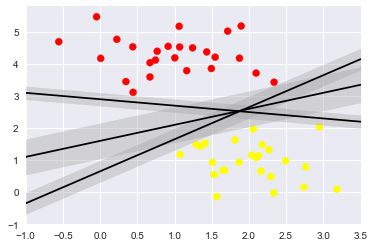

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

# Using scikit

In [8]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:


def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



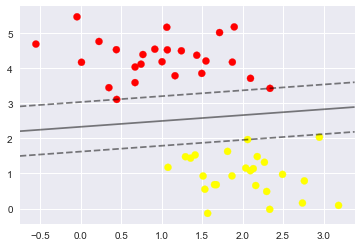

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);


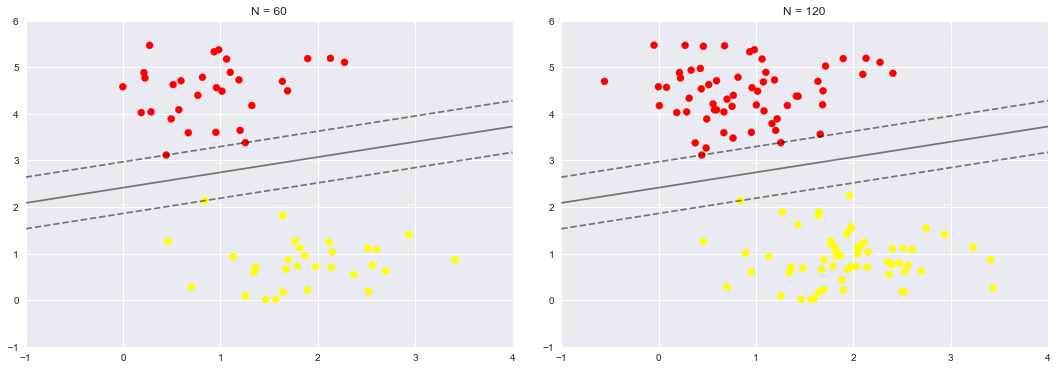

In [12]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [13]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm>

# using kernel function for non linear data

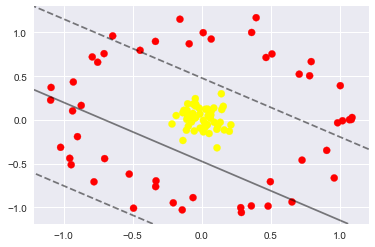

In [15]:


from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);



In [16]:
r = np.exp(-(X ** 2).sum(1))


In [18]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),X=fixed(X), y=fixed(y));


interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

rs = np.random.RandomState(1234)

# Generate some fake data.
n_samples = 200
# X is the input features by row.
X = np.zeros((200,3))
X[:n_samples/2] = rs.multivariate_normal( np.ones(3), np.eye(3), size=n_samples/2)
X[n_samples/2:] = rs.multivariate_normal(-np.ones(3), np.eye(3), size=n_samples/2)
# Y is the class labels for each row of X.
Y = np.zeros(n_samples); Y[n_samples/2:] = 1

# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(X,Y)

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
plt.show()

TypeError: 'float' object is unsliceable